# Taher Muhammedali - 0478012

## Assignment 2 - Task 1 - Data Science ESM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### (a)

In [2]:
fn = "https://tubcloud.tu-berlin.de/s/ppRkB2mwsKkJrRm/download/time-series-lecture-2.csv"

In [3]:
df = pd.read_csv(fn, index_col=0)
df.index = pd.to_datetime(df.index)
df.head(3)

,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh]
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,NaN
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,NaN
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,NaN


### (b) & (c)

In [4]:
# Rescaling both wind and solar to fulfill load requirements and saving in dataframe

In [5]:
loadperwind = sum(df['load [GW]']) / sum(df['onwind [pu]'])

In [6]:
loadpersolar = sum(df['load [GW]']) / sum(df['solar [pu]'])

In [7]:
df['onwind [GW]'] = df['onwind [pu]'] * loadperwind

In [8]:
df['solar [GW]'] = df['solar [pu]'] * loadpersolar

In [9]:
round(sum(df['onwind [GW]'])) == round(sum(df['load [GW]'])) == round(sum(df['solar [GW]'])) # Verifying if scaling was done properly

True

In [10]:
df.head(3)

,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh],onwind [GW],solar [GW]
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,NaN,41.700539,0.0
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,NaN,44.177008,0.0
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,NaN,46.493705,0.0


### (d)

In [11]:
# Calculating Mismatch for both Wind & Solar

In [12]:
df['onwindmismatch'] = df['load [GW]'] - df['onwind [GW]']
df['solarmismatch'] = df['load [GW]'] - df['solar [GW]']

df.head(3)

,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh],onwind [GW],solar [GW],onwindmismatch,solarmismatch
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,NaN,41.700539,0.0,-0.549539,41.151
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,NaN,44.177008,0.0,-4.042008,40.135
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,NaN,46.493705,0.0,-7.387705,39.106


### (e)

In [13]:
# Plotting the mismatch time series for both

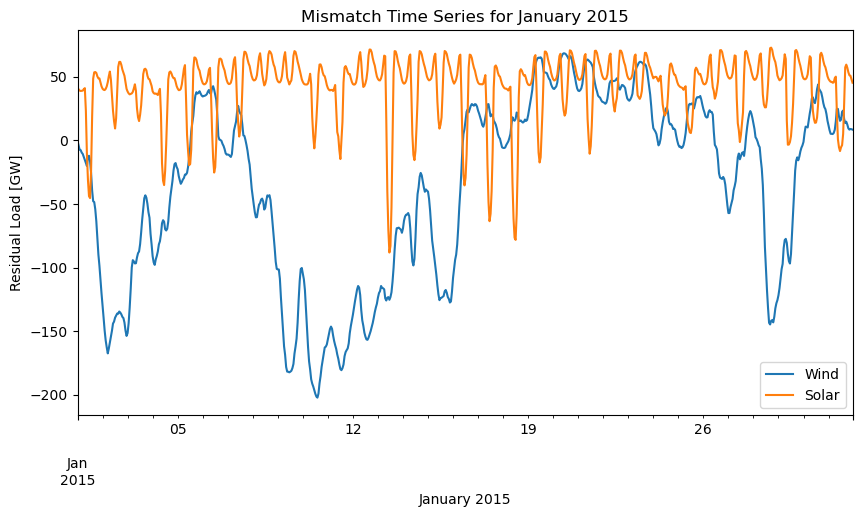

In [14]:
fig = plt.figure(figsize=(10,5))
onwindvalues = df['onwindmismatch']
solarvalues = df['solarmismatch']
time = df.index
ts = pd.Series(onwindvalues, time)
ts.loc['2015-01'].plot()
vs = pd.Series(solarvalues, time)
vs.loc['2015-01'].plot()


plt.ylabel('Residual Load [GW]')
plt.xlabel('January 2015')
plt.title('Mismatch Time Series for January 2015')
plt.legend(('Wind','Solar'),loc="lower right")

In [15]:
# From the above graph we can see that in the month of January, the mismatch for Solar has a predictable pattern.
# But for Wind the pattern is not predictable and we can see that on some days the wind can produce much more power than load requirements.

### (f)

In [16]:
absonwindmismatch = abs(onwindvalues)
print('For wind - The peak absolute mismatch is', round(absonwindmismatch.max()),'GW and the total absolute mismatch is',round(absonwindmismatch.sum()),'GW')
abssolarmismatch = abs(solarvalues)
print('For solar - The peak absolute mismatch is', round(abssolarmismatch.max()),'GW and the total absolute mismatch is',round(abssolarmismatch.sum()),'GW')

For wind - The peak absolute mismatch is 202 GW and the total absolute mismatch is 335821 GW
For solar - The peak absolute mismatch is 300 GW and the total absolute mismatch is 544166 GW


### (g)

In [17]:
# Plotting the SOC for both Wind & Solar

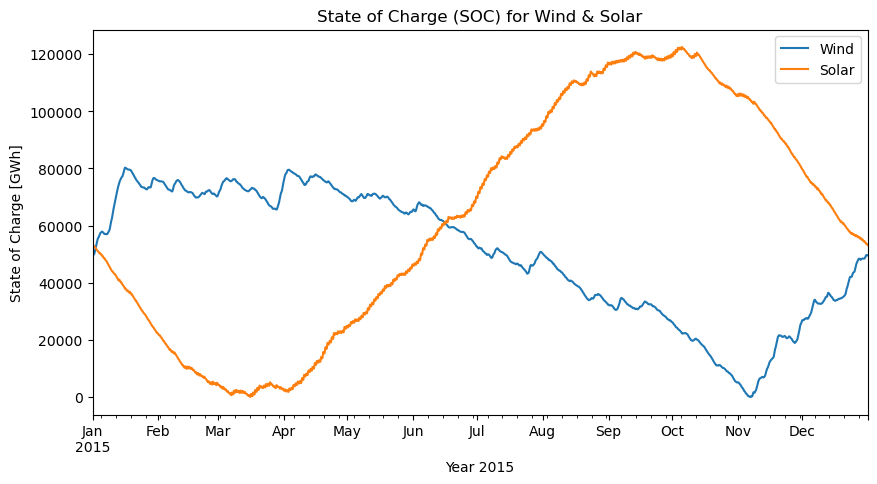

In [18]:
testdf = df.copy()
testdf['windcumsum'] = -np.cumsum(testdf.onwindmismatch) #Flipping values so that discharging means down and charging means up
windoff = min(testdf['windcumsum'])

testdf['solarcumsum'] = -np.cumsum(testdf.solarmismatch) #Flipping values so that discharging means down and charging means up
solaroff = min(testdf['solarcumsum'])

fig = plt.figure(figsize=(10,5))
z = testdf['windcumsum']
tsa = pd.Series(z+abs(windoff), time)
tsa.plot()

y = testdf['solarcumsum']
time = testdf.index
tsa = pd.Series(y+abs(solaroff), time)
tsa.plot()

plt.ylabel('State of Charge [GWh]')
plt.xlabel('Year 2015')
plt.title('State of Charge (SOC) for Wind & Solar')
plt.legend(('Wind','Solar'), loc="upper right")

In [19]:
# We can observe from the above SOC charts
# Solar - During the initial winter months it has a higher discharge than it can charge, however in the summer months the charging mismatch is higher and therefore this excess can be stored.
# Wind - During the initial winter months, wind can produce more than load which is when we can store the excess. In the second half of the year we can use this saved energy when the discharge rate is higher.

In [20]:
# The difference between highest discharging and highest charging state is the storage we require to align demand and supply
print("Smallest possible storage for Wind should be %.0f GW" % round(abs(windoff)))
print("Smallest possible storage for Solar should be %.0f GW" % round(abs(solaroff)))

Smallest possible storage for Wind should be 49614 GW
Smallest possible storage for Solar should be 53215 GW


### (h)

In [21]:
# Energy capacity is the maximum energy to be stored at one point + max charge capacity - max discharge capacity
# Discharge is highest mismatch value
# Charge is lowest mismatch value

In [22]:
print("Energy capacity for wind storage should be %.0f GWh" % max(testdf['windcumsum']))
print("Charge capacity for wind storage should be %.0f GW" % abs(min(df['onwindmismatch'])))
print("Discharge capacity for wind storage should be %.0f GW" % max(df['onwindmismatch']))

Energy capacity for wind storage should be 30664 GWh
Charge capacity for wind storage should be 202 GW
Discharge capacity for wind storage should be 68 GW


In [23]:
print("Energy capacity for solar storage should be %.0f GWh" % max(testdf['solarcumsum']))
print("Charge capacity for solar storage should be %.0f GW" % abs(min(df['solarmismatch'])))
print("Discharge capacity for solar storage should be %.0f GW" % max(df['solarmismatch']))

Energy capacity for solar storage should be 69283 GWh
Charge capacity for solar storage should be 300 GW
Discharge capacity for solar storage should be 76 GW


### (i)

In [24]:
# Function takes value of alpha for wind share (remaining solar) and calculates the residual/excess load (mismatch)
def residualload(a):
    windratio = a
    solarratio = 1-a
    loadshare = df['load [GW]'] - (df['onwind [GW]']*windratio + df['solar [GW]']*solarratio)
    return loadshare

### (j)

In [25]:
# Creating a list with alpha values to loop
alphalist = np.linspace(0, 100, 21) / 100
alphalist = alphalist.tolist()

In [26]:
# Creating an empty dataframe with same index and calling the function residualload for as many alpha values in the list generated above

string = 'alpha='
newdf = pd.DataFrame(index=df.index)
for alpha in alphalist:
    newdf['a'] = residualload(alpha)
    newcolname = string + str(round(alpha*100)) + "%"
    newdf.rename(columns = {'a': newcolname}, inplace = True)

In [27]:
newdf.head(2)

,alpha=0%,alpha=5%,alpha=10%,alpha=15%,alpha=20%,alpha=25%,alpha=30%,alpha=35%,alpha=40%,alpha=45%,...,alpha=55%,alpha=60%,alpha=65%,alpha=70%,alpha=75%,alpha=80%,alpha=85%,alpha=90%,alpha=95%,alpha=100%
2015-01-01 00:00:00,41.151,39.065973,36.980946,34.895919,32.810892,30.725865,28.640838,26.555811,24.470784,22.385757,...,18.215703,16.130676,14.045649,11.960623,9.875596,7.790569,5.705542,3.620515,1.535488,-0.549539
2015-01-01 01:00:00,40.135,37.926150,35.717299,33.508449,31.299598,29.090748,26.881898,24.673047,22.464197,20.255346,...,15.837646,13.628795,11.419945,9.211094,7.002244,4.793394,2.584543,0.375693,-1.833158,-4.042008


### (k)

In [28]:
# Plotting the required charge and discharge capacities

Text(0.5, 1.0, 'Discharge Capacity as a function of Alpha')

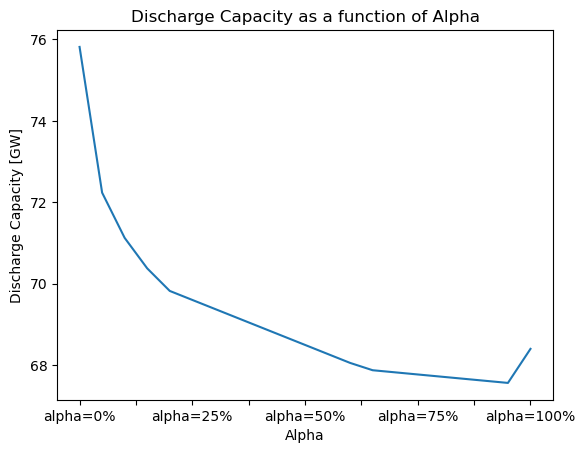

In [29]:
newdf.max(axis=0).plot()
plt.ylabel('Discharge Capacity [GW]')
plt.xlabel('Alpha')
plt.title('Discharge Capacity as a function of Alpha')

Text(0.5, 1.0, 'Charge Capacity as a function of Alpha')

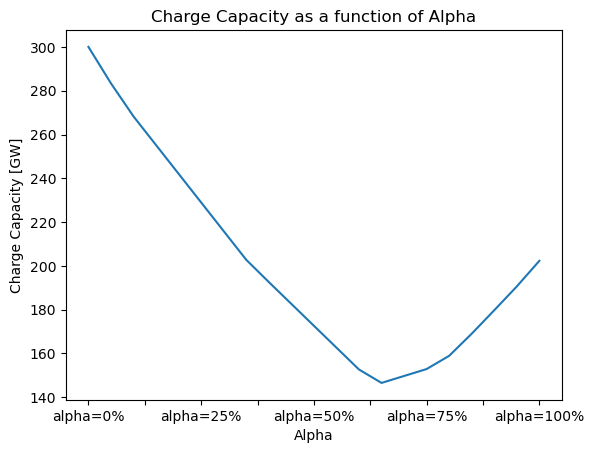

In [30]:
abs(newdf.min(axis=0)).plot()
plt.ylabel('Charge Capacity [GW]')
plt.xlabel('Alpha')
plt.title('Charge Capacity as a function of Alpha')

### (l)

In [31]:
# Calculating cumulative sum for each alpha and saving in a list and then plotting

In [32]:
y = list(range(0, 21))
cumsumlist = []
for x in y:
    z = abs(np.cumsum(newdf.iloc[:, x]).min())
    cumsumlist.append(z)

In [33]:
alphaname = list(newdf.columns)

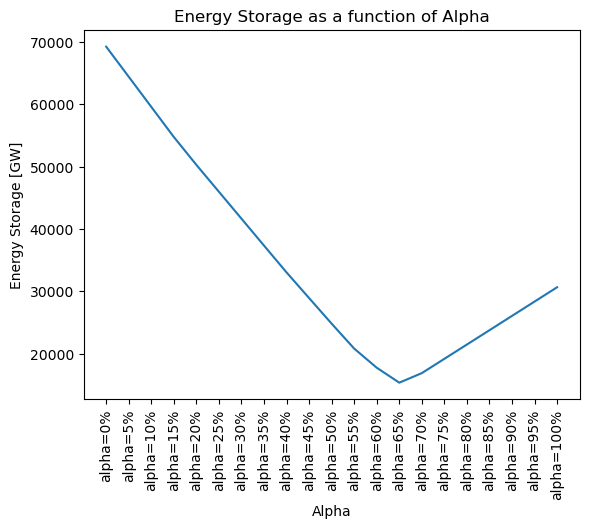

In [34]:
plt.xticks(rotation=90)
plt.ylabel('Energy Storage [GW]')
plt.xlabel('Alpha')
plt.title('Energy Storage as a function of Alpha')
plt.plot(alphaname , cumsumlist)

### (m)

In [35]:
# Calculating Energy Capacity for all Alphas

In [36]:
y = list(range(0, 21))
cumsumlist = []
for x in y:
    z = abs(np.cumsum(newdf.iloc[:, x]).max())
    cumsumlist.append(z)

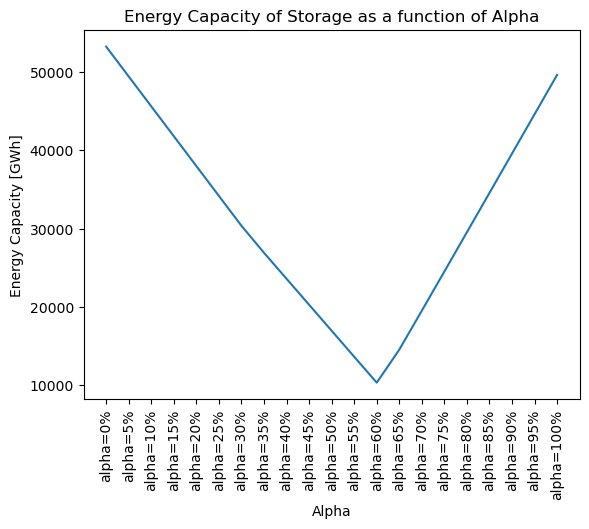

In [37]:
plt.xticks(rotation=90)
plt.ylabel('Energy Capacity [GWh]')
plt.xlabel('Alpha')
plt.title('Energy Capacity of Storage as a function of Alpha')
plt.plot(alphaname , cumsumlist)

### (n)

In [38]:
# Finding the alpha at which energy capacity is the lowest

In [39]:
ghi = pd.DataFrame()
ghi['Alpha'] =  alphalist
ghi['Energy_Capacity'] = cumsumlist

In [40]:
minloc = ghi.loc[ghi['Energy_Capacity'] == ghi.Energy_Capacity.min() , 'Alpha'].item() *100

In [41]:
print("The lowest energy capacity is",round(ghi.Energy_Capacity.min()),"GWh which occurs at alpha =",minloc,"%")

The lowest energy capacity is 10350 GWh which occurs at alpha = 60.0 %


### (o)

In [42]:
# Plotting SOC for alpha=60% with 100% wind and 100% solar

Text(0.5, 1.0, 'State of Charge (SOC) for Wind, Solar & Alpha=60%')

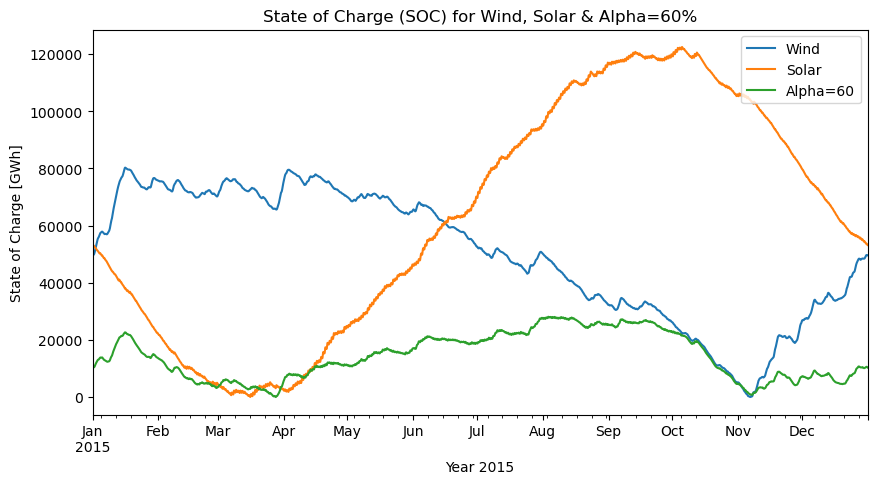

In [43]:
testdf = df.copy()
testdf['alpha60'] = newdf['alpha=60%']

testdf['windcumsum'] = -np.cumsum(testdf.onwindmismatch)
windoff = min(testdf['windcumsum'])

testdf['solarcumsum'] = -np.cumsum(testdf.solarmismatch)
solaroff = min(testdf['solarcumsum'])

testdf['alpha60cumsum'] = -np.cumsum(testdf.alpha60)
alphaoff = min(testdf['alpha60cumsum'])

fig = plt.figure(figsize=(10,5))

z = testdf['windcumsum']
tsa = pd.Series(z+abs(windoff), time)
tsa.plot()

y = testdf['solarcumsum']
time = testdf.index
tsa = pd.Series(y+abs(solaroff), time)
tsa.plot()

l = testdf['alpha60cumsum']
tsa = pd.Series(l+abs(alphaoff), time)
tsa.plot()

plt.legend(('Wind','Solar','Alpha=60'),loc="upper right")
plt.ylabel('State of Charge [GWh]')
plt.xlabel('Year 2015')
plt.title('State of Charge (SOC) for Wind, Solar & Alpha=60%')

### (p)

In [44]:
energycap = [200, 10]
chargecap = [50, 500]
dischargecap = [50, 500]

energytotal = [i * abs(testdf['alpha60cumsum'].min()) * 1e6 for i in energycap] # Converting from GW to kW by * 1e6
chargetotal = [i * abs(newdf['alpha=60%'].min()) * 1e6 for i in chargecap]
dischargetotal = [i * newdf['alpha=60%'].max() * 1e6 for i in dischargecap]

In [45]:
for i in range(0,2):
    print ("The total cost at alpha=60 for Storage Technology %.0f € is %.0f Billion" % ((i+1,(energytotal[i] + chargetotal[i] + dischargetotal[i])/ 1e9)))

The total cost at alpha=60 for Storage Technology 1 € is 2081 Billion
The total cost at alpha=60 for Storage Technology 2 € is 214 Billion


In [46]:
# I would choose Storage Technology B based on above analysis as it is cheaper than Technology A by almost 10 times